# Breast Cancer Classification

# 1. Introduction

* Breast cancer is the most prevalent form of cancer, accounting for 12.5% of all cancer cases in both men and women, and 25.8% of cancer cases in women. The transformation of normal cells into cancer cells occurs gradually and involves multiple stages.</br></br>

* Nuclear morphometry can measure these morphological abnormalities in nuclear size, shape, and texture and correlate with tumor grades.  In this procedure, significant changes in nuclear characteristics like perimeter, radius, compactness, and concave points have been observed, demonstrating its ability to distinguish between benign and malignant cells.</br></br>

* This objective tool, nuclear morphometry, is valuable in differentiating breast lesions as either benign or malignant. In conjunction with other supplementary methods such as mammography, it can aid in diagnosing the disease..</br></br>

* It is worth mentioning that the grade of breast cancer is determined by comparing the cancer cells to normal breast cells. The closer the cancer cells resemble normal cells, the slower their growth rate, which leads to a more favorable prognosis.



# 2. Objective

In this study, classification models were trained and tested using a breast cancer dataset that included nuclear morphometric features. The primary objective was to compare the accuracy of these models.

* Decision Trees
* SVC
* XGBoost

# 3. Load Data

In [96]:
# Import libraries for Data loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")



In [97]:
# Load data into a pandas Dataframe
df = pd.read_csv("./data.csv", sep=",")

# View first 5 rows in the Dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 4. Data Preparation and Exploration

Nuclear size, shape, and texture were represented by ten computer-generated nuclear characteristics, each of which had a corresponding mean value, worst value(largest extreme), and standard error. 



In [98]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


* The dataset consists of various columns, with "diagnosis" being the only column containing string/object values, while the remaining columns contain float values. The "diagnosis" column will be converted into numerical data type later in the code. 


* It is worth noting that there are no null values present in any of the columns, which is a tidy and complete dataset.



In [99]:
#drop id column
df = df.drop(["id"], axis=1)

## Find the correlation between the features

* In mathematics, the correlation coefficient measures the degree of linear association between two variables. The corr() function in pandas calculates the correlation coefficient based on the values in a DataFrame.

* Mathematically, the correlation coefficient between two variables X and Y, denoted as r(X, Y), is calculated as follows:

 r(X, Y) = (Σ((Xi - X̄) * (Yi - Ȳ))) / (n * σ(X) * σ(Y))

, where:

- Xi and Yi are individual observations of X and Y, respectively.
- X̄ and Ȳ are the means of X and Y, respectively.
- σ(X) and σ(Y) are the standard deviations of X and Y, respectively.
- n is the number of observations.

The correlation coefficient ranges from -1 to 1, where:

- r(X, Y) = 1 indicates a perfect positive linear relationship.
- r(X, Y) = -1 indicates a perfect negative linear relationship.
- r(X, Y) = 0 indicates no linear relationship between X and Y.

In [100]:
pd.DataFrame(df.iloc[:,1:].corr().unstack().sort_values().drop_duplicates())

0
fractal_dimension_mean radius_mean            -0.311631
                       area_mean              -0.283110
perimeter_mean         fractal_dimension_mean -0.261477
fractal_dimension_mean radius_worst           -0.253691
area_worst             fractal_dimension_mean -0.231854
...                                                 ...
perimeter_mean         area_mean               0.986507
area_mean              radius_mean             0.987357
perimeter_worst        radius_worst            0.993708
perimeter_mean         radius_mean             0.997855
radius_mean            radius_mean             1.000000

[436 rows x 1 columns]

### Percentage of benign and malignant diagnosis

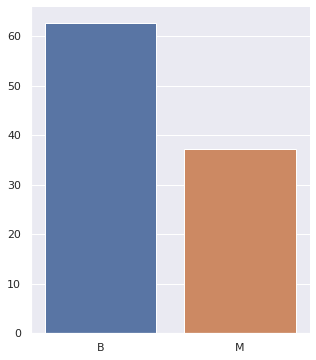

In [101]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,6))

column_name = "diagnosis"
percentage_values = (df[column_name].value_counts(normalize=True) * 100).reset_index()

sns.barplot(y = percentage_values["proportion"].values, x=percentage_values["diagnosis"].values)

sns.despine()

In [102]:
df["diagnosis"].value_counts() 

diagnosis
B    357
M    212
Name: count, dtype: int64

###### There are about 37-38% Malignant and 62-63% Benign diagnosis
The data is imbalanced, therefore we can upsample the minority class sample with replacement to match the majority class reproducible results:



In [68]:
from sklearn.utils import resample
from collections import Counter

# Balancing the imbalanced dataset 
df_majority = df[df["diagnosis"] == "B"]
df_minority = df[df["diagnosis"] == "M"]

# Upsample the minority class sample with replacement to 
# Match the majority class reproducible results 
df_minority_upsampled = resample(df_minority, 
                                replace = True, 
                                n_samples = 357, 
                                random_state = 123)

# Combine the majority class with upsampled minority class 
df = pd.concat([df_majority, df_minority_upsampled])

# Displaying the new class distribution 
counter = Counter(df["diagnosis"])
print(counter)

Counter({'B': 357, 'M': 357})


**Exclude the target column "diagnosis" to find the correlation between the features:**

In [103]:
data = df.iloc[:,1:]

### Extract the features with high positive correlation (greater than 0.9) : positive linear relationship.

In [104]:
correlation_matrix = data.corr()
correlation_matrix = data.corr()

# Find the indices of features with correlation above the threshold
indices = np.where((correlation_matrix > 0.9) & (correlation_matrix != 1))
# Extract the pairs of features with high correlation
feature_pairs = []
for i in range(len(indices[0])):
    feature_pair = (correlation_matrix.index[indices[0][i]], correlation_matrix.columns[indices[1][i]])
    feature_pairs.append(feature_pair)

# Display the feature pairs
for pair in feature_pairs:
    print(pair)

('radius_mean', 'perimeter_mean')
('radius_mean', 'area_mean')
('radius_mean', 'radius_worst')
('radius_mean', 'perimeter_worst')
('radius_mean', 'area_worst')
('texture_mean', 'texture_worst')
('perimeter_mean', 'radius_mean')
('perimeter_mean', 'area_mean')
('perimeter_mean', 'radius_worst')
('perimeter_mean', 'perimeter_worst')
('perimeter_mean', 'area_worst')
('area_mean', 'radius_mean')
('area_mean', 'perimeter_mean')
('area_mean', 'radius_worst')
('area_mean', 'perimeter_worst')
('area_mean', 'area_worst')
('concavity_mean', 'concave_points_mean')
('concave_points_mean', 'concavity_mean')
('concave_points_mean', 'concave_points_worst')
('radius_se', 'perimeter_se')
('radius_se', 'area_se')
('perimeter_se', 'radius_se')
('perimeter_se', 'area_se')
('area_se', 'radius_se')
('area_se', 'perimeter_se')
('radius_worst', 'radius_mean')
('radius_worst', 'perimeter_mean')
('radius_worst', 'area_mean')
('radius_worst', 'perimeter_worst')
('radius_worst', 'area_worst')
('texture_worst', 't

Let's take a closer look at some of the correlations using a Scatter Plot

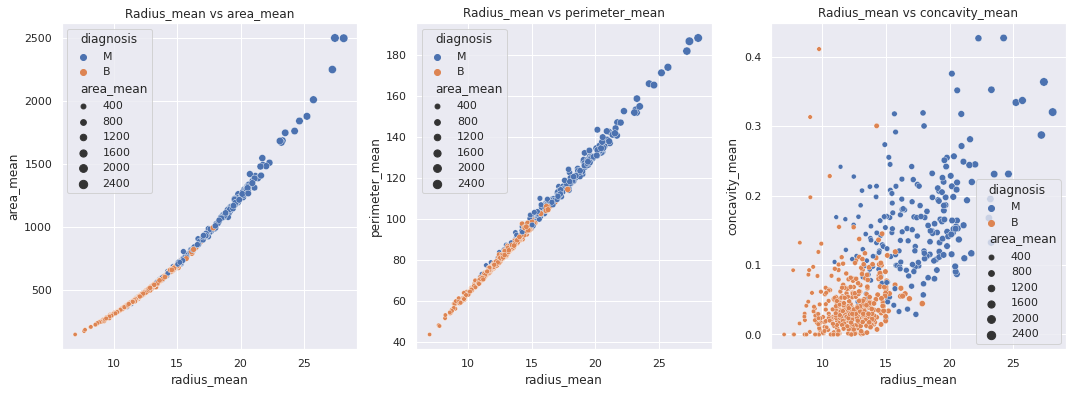

In [105]:
#Plot scatter plots between radius_mean and area_mean, perimeter_mean, concavity_mean columns
cols = ['area_mean','perimeter_mean', 'concavity_mean']
fig, ax = plt.subplots(ncols=len(cols), figsize=(6 * len(cols),6), sharex = True)
for i in range(len(cols)):
  g = sns.scatterplot(data=df, x="radius_mean", y=df[cols[i]], hue="diagnosis", size = "area_mean", ax  = ax[i]).set_title("Radius_mean vs "+cols[i])

fig.subplots_adjust(wspace=0.2)

* One observation is that as the nuclear radius increases, both the area (calculated using $\pi R^2$) and perimeter (calculated using $2 \pi R$) increase linearly. This indicates a positive correlation between these parameters.


* A comparison between benign and malignant cells reveals distinct differences in nuclear morphometry. Malignant cells exhibit larger nuclear areas, perimeters, and concavity compared to benign cells. This implies that these morphometric parameters can serve as distinguishing factors between benign and malignant cells, with malignant cells tending to have larger nuclear sizes. 



# 5. Data Preprocessing

**5.1 Label Encoder**

It was observed that the "diagnosis" column is the only categorical variable in the dataset. To convert the categorical values in the "diagnosis" column into numerical representations, we will employ a Label Encoder. 

This encoding technique will assign unique numerical codes to the column values, enabling us to work with the target variable effectively in numerical form.

In [106]:
encoder = LabelEncoder()
# Apply encoder on column 'diagnosis'
df['diagnosis'] = df[['diagnosis']].apply(encoder.fit_transform)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**'diagnosis' has been converted into values '1' for Malignant and '0' for Benign.**


### Divide dataset into feature variables and target variable as X & y respectively.

**5.2 Create X and y variable sets**

In [107]:
# Take copy of the dataset
df_copy = df.copy(deep = True)

# Create X (feature set) and y (target) variables
X = df.drop(['diagnosis'],axis=1)
y = df['diagnosis'].to_frame()

# Create X_copy variable
X_copy = df_copy.drop(['diagnosis'],axis=1)

In [108]:
df_copy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**5.3 Feature Scaling**

Apply Standard Scaler to feature variable set X_copy

In [109]:
# Instantiate Stander Scaler and fit and tranform feature variable set X
scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
X_copy_scaled = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_copy.columns)

**5.4 Dimensionality Reduction using PCA**

Principal Component Analysis (PCA) is a method used to decrease the number of variables while preserving most of the important information. . It transforms a number of variables that may be correlated into a smaller number of uncorrelated variables, known as principal components.

The primary aim of PCA is to simplify the features of your model by using fewer components. This simplification aids in visualizing patterns in your data and improves the speed of your model. Additionally, PCA reduces the risk of overfitting your model by eliminating highly correlated features.

We reduce dimensions on the scaled dataset using PCA with 90% explained variance. Explained variance is a measure of how much of the total variance in a dataset can be explained by a particular model. It is a measure used to evaluate how well a model fits the data. It is calculated by taking the ratio of the variance explained by the model to the total variance of the data. A higher explained variance indicates that the model is capturing more of the underlying structure of the data.
    

In [124]:
# Reduce dimensions on the scaled dataset using PCA with 95% variance retained
pca = PCA(n_components = 0.95)
pca.fit(X_copy_scaled)
X_copy_scaled = pca.transform(X_copy_scaled)
X_copy_scaled = pd.DataFrame(X_copy_scaled)
X_copy_scaled.head()

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495


There are 7 components that explain the 90% of the explained variance in our data. 

# 6. Model Training and Prediction

In [125]:
# Import libraries for Model training, prediction and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#The accuracy_score function is a part of the scikit-learn library in
#Python, and it is used to calculate the accuracy of classification
#models. It compares the predicted labels of a classification model 
#with the true labels and returns the accuracy score.

**6.1 Split Data into Train and Test Sets**

In [126]:
# Split Data into Train and Test sets with 80% of data as Train set and 20% as Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_copy_scaled, y, test_size = 0.2, random_state=0)

**6.2 Decision Tree**


Model:  DecisionTreeClassifier
Test Data AUC: 0.976


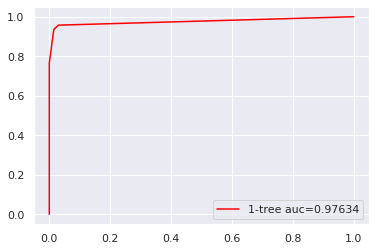

In [166]:
# Train and fit Decision Tree classifier

clf_dct = DecisionTreeClassifier(max_depth=2)
clf_dct.fit(X_train,np.ravel(y_train))
y_pred_dct = clf_dct.predict(X_test)
#pull the probabilities of having a heart disease
y_pred_proba_dct= clf_dct.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_dct) 
auc_dct = metrics.roc_auc_score(y_test, y_pred_proba_dct).round(5) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="1-tree auc="+str(auc_dct),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

print("Model: ",type(clf_dct).__name__)
print("Test Data AUC: %0.3f" % auc_dct)

In [165]:

#Evaluation 
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_dct))

0.9777777777777777


**6.3 SVC Classifier**

Model:  SVC
Test Data AUC: 0.984


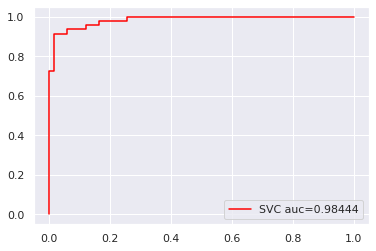

In [167]:
# Train and fit SVC classifier
clf_svc = SVC(probability=True)
clf_svc.fit(X_train,np.ravel(y_train))
y_pred_dct_svc = clf_svc.predict(X_test)

#pull the probabilities of having a heart disease
y_pred_proba_svc= clf_svc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_svc) 
auc_svc = metrics.roc_auc_score(y_test, y_pred_proba_svc).round(5) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="SVC auc="+str(auc_svc),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

print("Model: ",type(clf_svc).__name__)
print("Test Data AUC: %0.3f" % auc_svc)


In [130]:

#Evaluation 
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_dct_svc))

0.975609756097561


**6.4 Logistic Regression**

Model:  LogisticRegression
Test Data AUC: 0.994


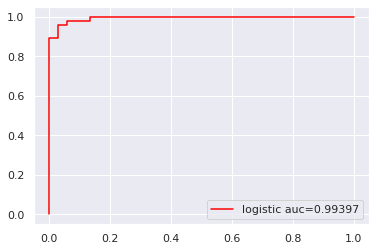

In [168]:
# Train and fit Decision Tree classifier
clf_logistic =LogisticRegression()
clf_logistic.fit(X_train,np.ravel(y_train))
y_pred_dct_logistic = clf_logistic.predict(X_test)

#pull the probabilities of having a heart disease
y_pred_proba_logistic= clf_logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_logistic) 
auc_logistic = metrics.roc_auc_score(y_test, y_pred_proba_logistic).round(5) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="logistic auc="+str(auc_logistic),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

print("Model: ",type(clf_logistic).__name__)
print("Test Data AUC: %0.3f" % auc_logistic)

In [151]:

#Evaluation 
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_dct_logistic))

0.9183673469387755


**6.5 XG Boost classifier**

Model:  XGBClassifier
Test Data AUC: 0.998


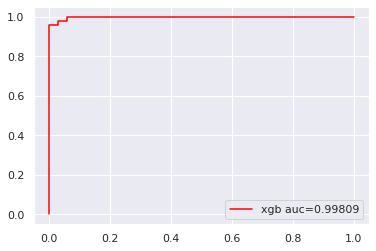

In [169]:
# Train and fit XGB classifier
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train,np.ravel(y_train))
y_pred_dct_xgb = clf_xgb.predict(X_test)

#pull the probabilities of having a heart disease
y_pred_proba_xgb= clf_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_xgb) 
auc_xgb = metrics.roc_auc_score(y_test, y_pred_proba_xgb).round(5) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="xgb auc="+str(auc_xgb),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

print("Model: ",type(clf_xgb).__name__)
print("Test Data AUC: %0.3f" % auc_xgb)

In [153]:

#Evaluation 
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_dct_xgb))

1.0


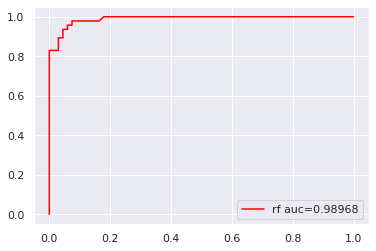

In [170]:
rf_model = RandomForestClassifier(max_depth = 1, n_estimators=10)
rf_model.fit(X_train,np.ravel(y_train))
y_pred_dct_rf = rf_model.predict(X_test)

y_pred_proba_rf = rf_model.predict_proba(X_test)[::,1] #pull the probabilities of having a heart disease
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf) #calculate the false positive rate and true positive rate
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf).round(5) #calculate the area under the curve (AUC)
plt.plot(fpr,tpr,label="rf auc="+str(auc),color='red') #generate the ROC curve
plt.legend(loc=4) #position the label in the bottom right corner

In [155]:

#Evaluation 
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred_dct_rf))

0.9767441860465116


# 7. Model Evaluation

**7.1 Model Evaluation using K-Fold Cross Validation**

In [156]:
# Function to fit classifier, perform K-Fold Cross validation print Accuracy score and confusion matrix
def model_hypertuning(classifier, params, X_train, y_train,
                             X_test, y_test, X = X, y = y):
    classifier.set_params(**params)
    classifier.fit(X_train,np.ravel(y_train))
    y_pred = classifier.predict(X_test)
    print(precision_score(y_test,y_pred))
    
    y_pred_proba = classifier.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba).round(5) 
    print("Model: ",type(classifier).__name__)
    print("Test Data Accuracy: %0.2f" % auc)
    print("K-Fold Cross Validation Accuracy: %0.2f" % cross_val_score(classifier, X, np.ravel(y), scoring='roc_auc', cv=5).mean())
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks([0, 1], ['0', '1'])
    plt.yticks([0, 1], ['0', '1'])
    
    tn, fp, fn, tp = cm.ravel()
    plt.text(0, 0, f"TN = {tn}", ha='center', va='center', color='white')
    plt.text(1, 1, f"TP = {tp}", ha='center', va='center', color='white')
    plt.text(1, 0, f"FN = {fn}", ha='center', va='center', color='black')
    plt.text(0, 1, f"FP = {fp}", ha='center', va='center', color='black')

    plt.grid(False)
    plt.show()


**7.2 Hyperparameter tuning using RandomizedSearchCV on Decision Tree Classifier**

{'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}
0.9090909090909091
Model:  DecisionTreeClassifier
Test Data Accuracy: 0.93
K-Fold Cross Validation Accuracy: 0.94


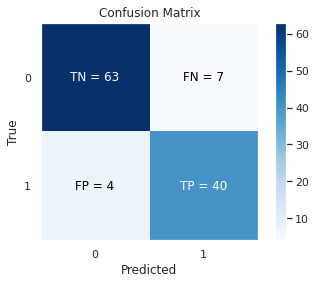

In [157]:
clf_dct = DecisionTreeClassifier(max_depth=2)

params = { 'max_depth' : [3,5,10,15,20,25,30,35,40,45,50],
          'criterion' : ["gini","entropy"],
          'max_features' : ['sqrt', 'log2'],
          'min_samples_split' : [2,4,6,8,10]
         }

grid = RandomizedSearchCV(clf_dct, params, n_jobs=-1)
grid.fit(X_train, np.ravel(y_train))
print(grid.best_params_)
model_hypertuning(clf_dct,grid.best_params_,X_train, y_train, 
                         X_test, y_test)

**7.3 Hyperparameter tuning using using RandomizedSearchCV on SVC Classifier**

0.9555555555555556
Model:  SVC
Test Data Accuracy: 0.99
K-Fold Cross Validation Accuracy: 0.97


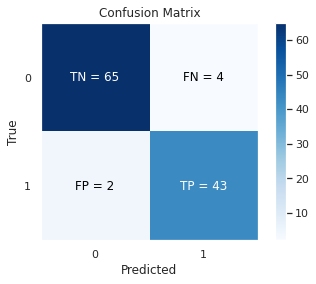

In [161]:
clf_svc = SVC(probability=True)

params = { 'kernel' : ['linear','rbf','poly','sigmoid'],
          'C' : [0.1,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5],
          'degree' : [1,2,3,4,5,6]
         }
grid = RandomizedSearchCV(clf_svc, params, n_jobs=-1)
grid.fit(X_train_scaled, np.ravel(y_train_scaled))

model_hypertuning(clf_svc,grid.best_params_,X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

**7.4 Hyperparameter tuning using RandomizedSearchCV on Logistic Regression**


{'penalty': 'l2', 'max_iter': 500, 'C': 5.700000000000001}
0.92
Model:  LogisticRegression
Test Data Accuracy: 1.00
K-Fold Cross Validation Accuracy: 0.99


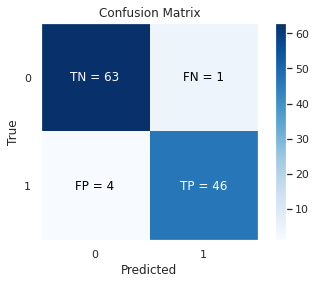

In [162]:
clf_logistic =LogisticRegression()

params = {
    'C': np.arange(0.1, 10,0.2),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300,500]  # Maximum number of iterations
}
grid = RandomizedSearchCV(clf_logistic, params)
grid.fit(X_train, np.ravel(y_train))

print(grid.best_params_)
model_hypertuning(clf_logistic,grid.best_params_,X_train, y_train, 
                         X_test, y_test)

**7.5 Hyperparameter tuning using RandomizedSearchCV on XG Boost Classifier**

{'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.4}
0.9782608695652174
Model:  XGBClassifier
Test Data Accuracy: 1.00
K-Fold Cross Validation Accuracy: 0.99


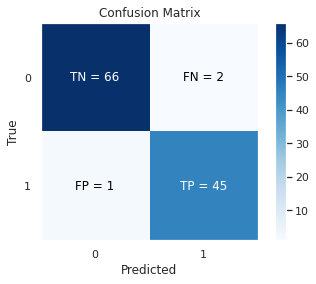

In [163]:
clf_xgb = xgb.XGBClassifier()
params = { 'learning_rate' : [0.05,0.1,0.15,0.2,0.25,0.3],
          'max_depth' : [3,4,5,6,8,10,12,16],
          'min_child_weight' : [1,3,5,7],
          'gamma' : [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4],
          'colsample_bytree' : [0.3,0.4,0.5,0.6]
         }
grid = RandomizedSearchCV(clf_xgb, params, n_jobs=-1)
grid.fit(X_train, np.ravel(y_train))
print(grid.best_params_)

model_hypertuning(clf_xgb,grid.best_params_,X_train, y_train, 
                         X_test, y_test)

**7.6 Hyperparameter tuning using RandomizedSearchCV on Random Forest Classifier**

{'n_estimators': 10, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 10}
0.92
Model:  RandomForestClassifier
Test Data Accuracy: 1.00
K-Fold Cross Validation Accuracy: 0.98


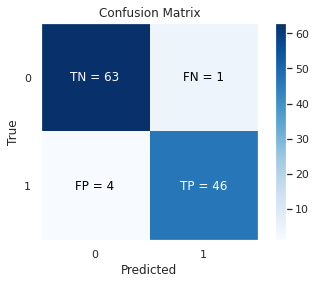

In [164]:
rf_model = RandomForestClassifier()
param = {
    'n_estimators': np.arange(10, 1000,200), # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 10,2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 5,1)  # Minimum number of samples required to be at a leaf node
}
grid = RandomizedSearchCV(rf_model, param)
grid.fit(X_train, np.ravel(y_train))
print(grid.best_params_)

model_hypertuning(rf_model,grid.best_params_,X_train, y_train, 
                         X_test, y_test)


* Using Hyperparameter tuning marginally increased the accuracy of all models.

